# Machine Learning - Tarea 2
---

---

<div style="text-align: right">
Vicente Lizana - 201310004-K
</div>
<div style="text-align: right">
Álvaro Valderrama - 201390005-4
</div>

---

In [1]:
import re
import nltk

import numpy as np
import pandas as pd
import seaborn as sns

from numpy import random as rnd
# from urllib import request as req
from matplotlib import pyplot as plt

from sklearn import preprocessing as skpp
from sklearn import decomposition as skdc
from sklearn import discriminant_analysis as skda
from sklearn import neighbors as skng
from sklearn import metrics as skmt
from sklearn import naive_bayes as sknb
from sklearn import svm as sksvm
from sklearn import model_selection as skms
from sklearn import linear_model as sklm
from sklearn.feature_extraction import text as sktx

from imblearn import over_sampling as imbos

from nltk import corpus as nlcp
from nltk.stem import porter as nlpt

---

---
## 1.- Reducción de Dimensionalidad para Clasificación

---
### 1.a

#### Datos

In [2]:
# train_data_url = "http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.train"
# test_data_url = "http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.test"
# train_data_f = req.urlretrieve(train_data_url, "train_data_1.csv")
# test_data_f = req.urlretrieve(test_data_url, "test_data_1.csv")
train_df_1 = pd.DataFrame.from_csv('train_data_1.csv',header=0,index_col=0)
test_df_1 = pd.DataFrame.from_csv('test_data_1.csv',header=0,index_col=0)

In [3]:
n_train = train_df_1.shape[0]
print("Cantidad de datos (train) :", n_train)
train_df_1.head()

Cantidad de datos (train) : 528


,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
2,2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
3,3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
4,4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
5,5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396


In [4]:
n_test = test_df_1.shape[0]
print("Cantidad de datos (test) :", n_test)
test_df_1.tail()

Cantidad de datos (test) : 462


,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
458,7,-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147
459,8,-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301
460,9,-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500
461,10,-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390
462,11,-3.291,2.324,-0.679,0.285,0.441,0.557,-0.227,0.115,-1.046,0.697


El conjunto de entrenamiento tiene 528 datos y el conjunto de prueba tiene 462. Cada dato tiene 10 atributos.

In [5]:
for i in range(1, 12):
    n_class = train_df_1[train_df_1["y"]==i].shape[0]
    print("Promedio Clase {:<2}: {}".format(i, n_class/n_train))

Promedio Clase 1 : 0.09090909090909091
Promedio Clase 2 : 0.09090909090909091
Promedio Clase 3 : 0.09090909090909091
Promedio Clase 4 : 0.09090909090909091
Promedio Clase 5 : 0.09090909090909091
Promedio Clase 6 : 0.09090909090909091
Promedio Clase 7 : 0.09090909090909091
Promedio Clase 8 : 0.09090909090909091
Promedio Clase 9 : 0.09090909090909091
Promedio Clase 10: 0.09090909090909091
Promedio Clase 11: 0.09090909090909091


Todas las clases tienen la misma proporción $\left(\frac{1}{11}\right)$, por lo que los datos están equirepresentados.

---
### 1.b

#### Preprocesamiento

In [6]:
X_1 = train_df_1.loc[:,'x.1':'x.10'].values
y_1 = train_df_1.loc[:,'y'].values

sscaler = skpp.StandardScaler().fit(X_1)
X_1_std = sscaler.transform(X_1)

---
### 1.c

#### PCA (not even once)

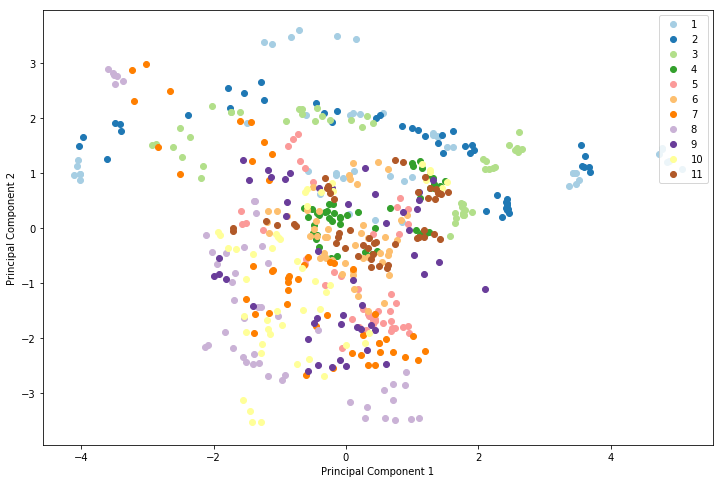

In [7]:
sklearn_pca = skdc.PCA(n_components=2)
Xred_pca = sklearn_pca.fit_transform(X_1_std)

paired_cmap = plt.cm.get_cmap('Paired')
mclasses=(1,2,3,4,5,6,7,8,9,10,11)
mcolors = [paired_cmap(i) for i in np.linspace(0,1,11)]

plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_pca[y_1==lab, 0],Xred_pca[y_1==lab, 1],label=lab,c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

---
### 1.d

#### LDA

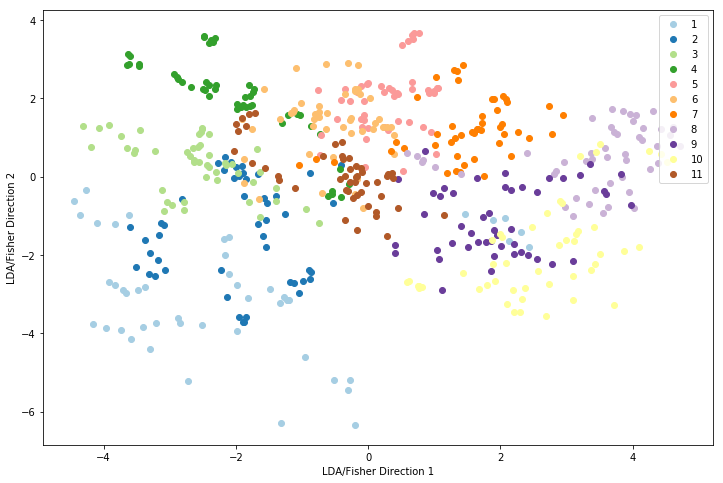

In [8]:
sklearn_lda = skda.LinearDiscriminantAnalysis(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_1_std,y_1)

plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_lda[y_1==lab, 0],Xred_lda[y_1==lab, 1],label=lab,c=col)
plt.xlabel('LDA/Fisher Direction 1')
plt.ylabel('LDA/Fisher Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

---
### 1.e

#### Comparación Cualitativa

De los gráficos podemos ver que si particionaramos el espacio en distintas regiones correspondientes a las diferentes clases, con _LDA_ tendríamos menos elementos mal clasificados que con _PCA_, ya que la superposición de elementos de diferentes clases es mucho menor.

Aparte, graficando los centros de gravedad de cada cluster, podemos ver que tan separadas quedan las clases.

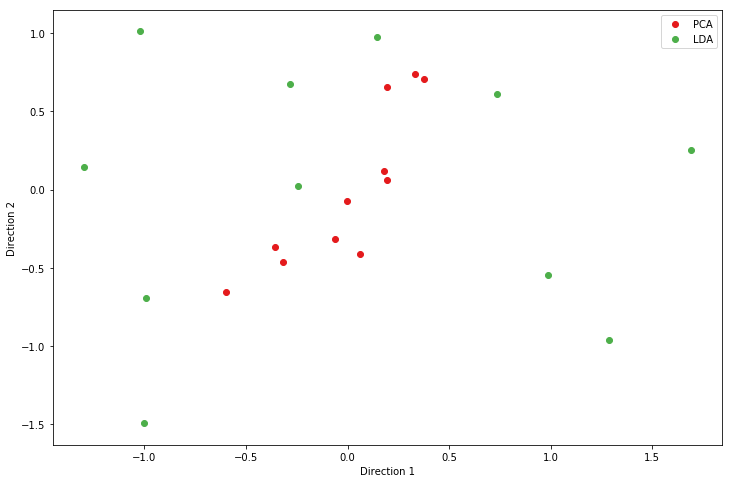

In [9]:
centers_pca = []
centers_lda = []

for lab in mclasses:
    centers_pca.append( np.sum(Xred_pca[y_1==lab], axis=0) /Xred_pca[y_1==lab].size )
    centers_lda.append( np.sum(Xred_lda[y_1==lab], axis=0) /Xred_lda[y_1==lab].size )
    
centers_pca = np.array(centers_pca)
centers_lda = np.array(centers_lda)

Set1_cmap = plt.cm.get_cmap('Set1')
green = Set1_cmap(0.25)
red = Set1_cmap(0)

plt.figure(figsize=(12, 8))
plt.scatter(centers_pca[:,0],centers_pca[:,1],label="PCA",c=red)
plt.scatter(centers_lda[:,0],centers_lda[:,1],label="LDA",c=green)
plt.xlabel('Direction 1')
plt.ylabel('Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

Podemos ver que los centros de _PCA_ se encuentran en una región mucho más acotada que los de _LDA_, lo cual no es deseable ya que si están más separados hay menos superposición.

---
### 1.f

#### Clasificador Aleatorio

In [10]:
# X_1_std.shape[0]
def random_classifier(x):
    return rnd.randint(1, 12, size=x.shape[0])

print("Porcentaje de acierto : ", y_1[(random_classifier(X_1) - y_1) == 0].size / y_1.size * 100)
print("Valor referencial     : ", 100/11)

Porcentaje de acierto :  9.848484848484848
Valor referencial     :  9.090909090909092


Se espera que la tasa de aciertos sea aproximadamente $\frac{1}{11}$, ya que para cada uno de los datos, el clasificador tiene por construcción una probabilidad de $\frac{1}{11}$ de acertar la clase correcta a la que pertenece el dato.

---
### 1.g

#### LDA - QDA - Vecinos más Cercanos

LDA:
train score:  0.683712121212
test score :  0.443722943723

QDA:
train score:  0.988636363636
test score :  0.471861471861

KNN:
max train score: (k=1) 1.0
max test score : (k=7) 0.5194805194805194
test score k=7 : 0.9640151515151515


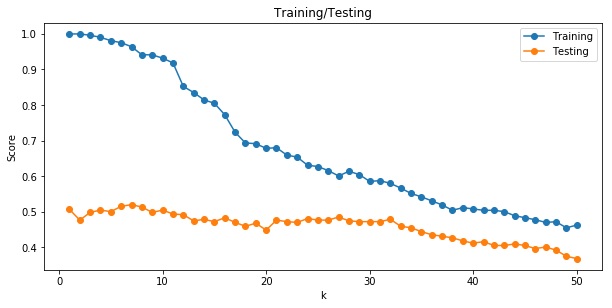

In [11]:
X_1_test = test_df_1.loc[:,'x.1':'x.10'].values
y_1_test = test_df_1.loc[:,'y'].values
X_1_std_test = sscaler.transform(X_1_test)

lda_model = skda.LinearDiscriminantAnalysis()
lda_model.fit(X_1_std,y_1)

print("LDA:")
print("train score: ", lda_model.score(X_1_std,y_1))
print("test score : ", lda_model.score(X_1_std_test,y_1_test))
print()

qda_model = skda.QuadraticDiscriminantAnalysis()
qda_model.fit(X_1_std,y_1)

print("QDA:")
print("train score: ", qda_model.score(X_1_std,y_1))
print("test score : ", qda_model.score(X_1_std_test,y_1_test))
print()

print("KNN:")
knn_scores_training = []
knn_scores_testing = []

k = range(1,51)
for c in k:
    knn_model = skng.KNeighborsClassifier(n_neighbors=c)
    knn_model.fit(X_1_std,y_1)
    knn_scores_training.append(knn_model.score(X_1_std,y_1))
    knn_scores_testing.append(knn_model.score(X_1_std_test,y_1_test))


print("max train score: (k={}) {}".format(np.argmax(knn_scores_training)+1, max(knn_scores_training)))
print("max test score : (k={}) {}".format(np.argmax(knn_scores_testing)+1, max(knn_scores_testing)))
print("test score k=7 : {}".format(knn_scores_training[6]))
    
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.xlabel("k")
plt.ylabel("Score")
plt.title("Training/Testing")
plt.plot(k,knn_scores_training, '-o',k,knn_scores_testing, '-o')
plt.legend(("Training", "Testing"), loc = "upper right")
plt.show()

* Sobre el conjunto de entrenamiento se comporta mejor _QDA_, excepto cuando _KNN_ usa un $k$ muy bajo, sin embargo esto no es tan deseable ya que podría existir _underfitting_.
* Sobre el conjunto de prueba el mejor es _KNN_ con $k=6$.
* Para $k$ grandes, _KNN_ podemos ver que el error en el _Train Set_ se acerca al error del _Test Set_, sin embargo a partir de cierto punto ámbos comienzan a decaer. Esto se debe a que se comienzan a considerar vecinos no tan cercanos, que alteran el resultado. Debido al tamaño de la muestra, 50 vecinos es un porcentaje demasiado significativo de la muestra. 
* Para $k$ pequeños el error es muy pequeño en el _Train Set_ pero no así en el _Test Set_.

---
### 1.h

#### PCA Again

In [12]:
lda_scores_pca = np.zeros((2,10))
qda_scores_pca = np.zeros((2,10))
knn_scores_pca = np.zeros((3,10))

for dim in range(10):
    current_pca = skdc.PCA(n_components=dim+1).fit(X_1_std)
    Xc_train_pca = current_pca.transform(X_1_std)
    Xc_test_pca = current_pca.transform(X_1_std_test)
    
    # LDA
    lda_model = skda.LinearDiscriminantAnalysis()
    lda_model.fit(Xc_train_pca,y_1)
    lda_scores_pca[:,dim] = np.array([
        lda_model.score(Xc_train_pca, y_1),
        lda_model.score(Xc_test_pca, y_1_test)
    ])
    
    # QDA
    qda_model = skda.QuadraticDiscriminantAnalysis()
    qda_model.fit(Xc_train_pca,y_1)
    qda_scores_pca[:,dim] = np.array([
        qda_model.score(Xc_train_pca, y_1),
        qda_model.score(Xc_test_pca, y_1_test)
    ])
    
    # KNN
    knn_scores_training = []
    knn_scores_testing = []

    k = range(1,31)
    for c in k:
        knn_model = skng.KNeighborsClassifier(n_neighbors=c)
        knn_model.fit(Xc_train_pca,y_1)
        knn_scores_training.append(knn_model.score(Xc_train_pca,y_1))
        knn_scores_testing.append(knn_model.score(Xc_test_pca,y_1_test))
        
    best_k = np.argmax(knn_scores_testing)
    knn_scores_pca[:,dim] = np.array([
        knn_scores_training[best_k],
        knn_scores_testing[best_k],
        best_k + 1
    ])

best k :  [ 15.  13.   1.   1.  12.   6.   2.   1.   6.   7.]


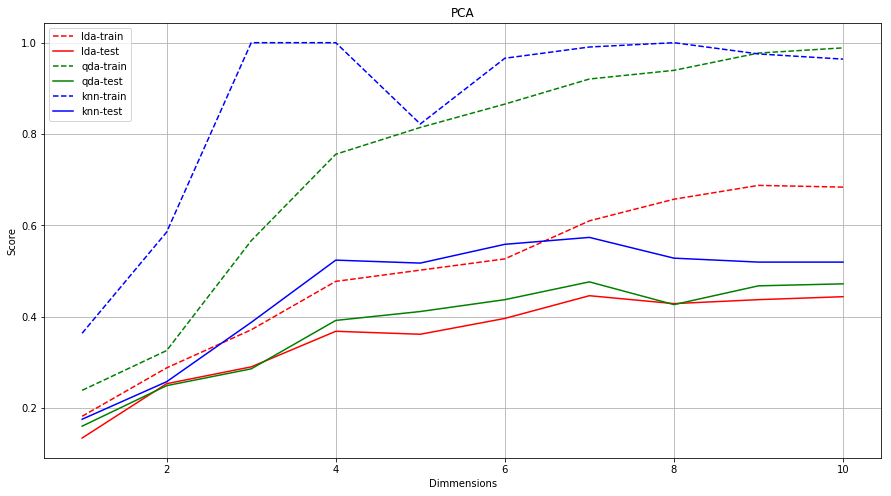

In [13]:
print("best k : ", knn_scores_pca[2,:])
plt.figure(figsize=(15,8))
plt.plot(range(1,11), lda_scores_pca[0,:], '--r', label="lda-train")
plt.plot(range(1,11), lda_scores_pca[1,:], '-r', label="lda-test")
plt.plot(range(1,11), qda_scores_pca[0,:], '--g', label="qda-train")
plt.plot(range(1,11), qda_scores_pca[1,:], '-g', label="qda-test")
plt.plot(range(1,11), knn_scores_pca[0,:], '--b', label="knn-train")
plt.plot(range(1,11), knn_scores_pca[1,:], '-b', label="knn-test")
plt.title("PCA")
plt.ylabel("Score")
plt.xlabel("Dimmensions")
plt.legend()
plt.grid()
plt.show()

Podemos ver en el gráfico que el desempeño de _PCA_ es relativamente creciente sobre el _test set_ y el error sobre el _train set_ es bajo en knn y qda. Esto no es tan deseable ya que el mayor desempeño se alcanza estando cerca de la dimensionalidad completa.

---
### 1.i

#### LDA

In [14]:
lda_scores_lda = np.zeros((2,10))
qda_scores_lda = np.zeros((2,10))
knn_scores_lda = np.zeros((3,10))

for dim in range(10):
    current_lda = skda.LinearDiscriminantAnalysis(n_components=dim+1).fit(X_1_std, y_1)
    Xc_train_lda = current_lda.transform(X_1_std)
    Xc_test_lda = current_lda.transform(X_1_std_test)
    
    # LDA
    lda_model = skda.LinearDiscriminantAnalysis()
    lda_model.fit(Xc_train_lda,y_1)
    lda_scores_lda[:,dim] = np.array([
        lda_model.score(Xc_train_lda, y_1),
        lda_model.score(Xc_test_lda, y_1_test)
    ])
    
    # QDA
    qda_model = skda.QuadraticDiscriminantAnalysis()
    qda_model.fit(Xc_train_lda,y_1)
    qda_scores_lda[:,dim] = np.array([
        qda_model.score(Xc_train_lda, y_1),
        qda_model.score(Xc_test_lda, y_1_test)
    ])
    
    # KNN
    knn_scores_training = []
    knn_scores_testing = []

    k = range(1,101)
    for c in k:
        knn_model = skng.KNeighborsClassifier(n_neighbors=c)
        knn_model.fit(Xc_train_lda,y_1)
        knn_scores_training.append(knn_model.score(Xc_train_lda,y_1))
        knn_scores_testing.append(knn_model.score(Xc_test_lda,y_1_test))
        
    best_k = np.argmax(knn_scores_testing)
    knn_scores_lda[:,dim] = np.array([
        knn_scores_training[best_k],
        knn_scores_testing[best_k],
        best_k + 1
    ])

best k :  [ 40.  33.  73.  62.  44.  70.  69.  58.   1.   9.]


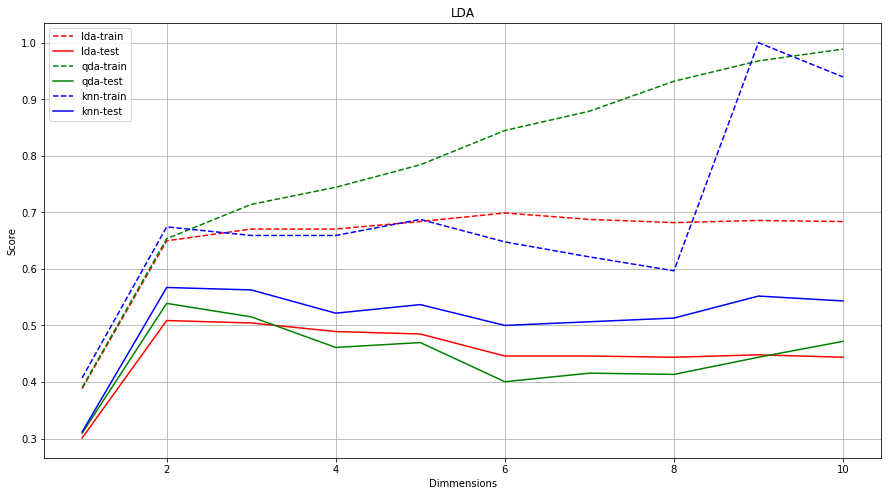

In [15]:
print("best k : ", knn_scores_lda[2,:])
plt.figure(figsize=(15,8))
plt.plot(range(1,11), lda_scores_lda[0,:], '--r', label="lda-train")
plt.plot(range(1,11), lda_scores_lda[1,:], '-r', label="lda-test")
plt.plot(range(1,11), qda_scores_lda[0,:], '--g', label="qda-train")
plt.plot(range(1,11), qda_scores_lda[1,:], '-g', label="qda-test")
plt.plot(range(1,11), knn_scores_lda[0,:], '--b', label="knn-train")
plt.plot(range(1,11), knn_scores_lda[1,:], '-b', label="knn-test")
plt.title("LDA")
plt.ylabel("Score")
plt.xlabel("Dimmensions")
plt.legend()
plt.grid()
plt.show()

Podemos ver que el rendimiento de _LDA_ crece muy rápido al principio, lo que hace que tengamos buenos resultados en dimensiones bajas. Posteriormente se mantiene relativamente constante, disminuyendo incluso en la mayor parte de los casos. Esto significa que _LDA_ no solo es eficiente conservando la información relevante si no que también disminuyendo el ruido.

---

---
## 2.- Análisis de Opiniones sobre Películas

---
### 2.a

#### Datos

In [16]:
# train_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train"
# test_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.dev"

# train_data_f = req.urlretrieve(train_data_url, "train_data_2.csv")
# test_data_f = req.urlretrieve(test_data_url, "test_data_2.csv")

with open("train_data_2.csv", encoding='ISO-8859-1') as ftr:
    rows = [line.strip().split(" ",1) for line in ftr.readlines()]
    train_df_2 = pd.DataFrame(rows, columns=['Sentiment','Text'])
    train_df_2['Sentiment'] = pd.to_numeric(train_df_2['Sentiment'])

with open("test_data_2.csv", encoding='ISO-8859-1') as fts:
    rows = [line.strip().split(" ",1) for line in fts.readlines()]
    test_df_2 = pd.DataFrame(rows, columns=['Sentiment','Text'])
    test_df_2['Sentiment'] = pd.to_numeric(test_df_2['Sentiment'])

print(train_df_2.shape)
print(test_df_2.shape)

(3554, 2)
(3554, 2)


Podemos ver que tanto el _train set_ como el _test set_ tienen 3554 comentarios.

In [17]:
train_df_2.head()

,Sentiment,Text
0,-1,"everything's serious , poetic , earnest and --..."
1,-1,"narratively , trouble every day is a plodding ..."
2,1,a truly wonderful tale combined with stunning ...
3,1,jason patric and ray liotta make for one splen...
4,-1,haneke keeps us at arm's length . guided more ...


In [18]:
test_df_2.tail()

,Sentiment,Text
3549,1,a fascinating documentary about the long and e...
3550,1,the filmmakers' eye for detail and the high st...
3551,1,throwing caution to the wind with an invitatio...
3552,-1,"a big , baggy , sprawling carnival of a movie..."
3553,1,"an incendiary , deeply thought-provoking look ..."


---
### 2.b

#### Word extractor, Part I

In [19]:
def word_extractor0(text):
    ps = nlpt.PorterStemmer()
    commonwords = nlcp.stopwords.words('english')
    commonwords.remove('not')
    
    text = re.sub(r'([a-z])\1+', r'\1\1', text)
    words = []
    wordtokens = [word.lower() for word in nltk.word_tokenize(text)]
    
    for word in wordtokens:
        if word not in commonwords:
            words.append(word)
            
    return " ".join(words)

In [20]:
print(word_extractor0("I love to eat cake"))
print(word_extractor0("I love eating cake"))
print(word_extractor0("I loved eating the cake"))
print(word_extractor0("I do not love eating cake"))
print(word_extractor0("I don't love eating cake"))
print()
print(word_extractor0("I loooooooooooooove eating caaaaaaaaaaaaake"))
print(word_extractor0("Iloveeatingcakeing!"))
print(word_extractor0("I love eating cakes"))

love eat cake
love eating cake
loved eating cake
not love eating cake
n't love eating cake

loove eating caake
iloveeatingcakeing !
love eating cakes


In [21]:
def word_extractor(text):
    ps = nlpt.PorterStemmer()
    commonwords = nlcp.stopwords.words('english')
    commonwords.remove('not')
    
    text = re.sub(r'([a-z])\1+', r'\1\1', text)
    words = []
    wordtokens = [ps.stem(word.lower()) for word in nltk.word_tokenize(text)]
    
    for word in wordtokens:
        if word not in commonwords:
            words.append(word)
            
    return " ".join(words)

In [22]:
print(word_extractor("I love to eat cake"))
print(word_extractor("I love eating cake"))
print(word_extractor("I loved eating the cake"))
print(word_extractor("I do not love eating cake"))
print(word_extractor("I don't love eating cake"))
print()
print(word_extractor("I loooooooooooooove eating caaaaaaaaaaaaake"))
print(word_extractor("Iloveeatingcakeing!"))
print(word_extractor("I love eating cakes"))

love eat cake
love eat cake
love eat cake
not love eat cake
n't love eat cake

loov eat caak
iloveeatingcak !
love eat cake


Podemos ver que la función deja toda la oración en _lowercase_ para poder agrupar bien las palabras, elimina las palabras comunes (excepto not ya que influye en el _Sentiment_), también reduce los grupos de caracteres repetidos a un máximo de 2.

Además el agregar Stemming remueve las conjugaciones de las palabras, dejando solo la raíz para desligar la palabra de su contexto gramatical.

---
### 2.c

#### Word extractor, Part II

In [23]:
def word_extractor2(text):
    wordlemmatizer = nltk.WordNetLemmatizer()
    commonwords = nlcp.stopwords.words('english')
    commonwords.remove('not')
    
    text = re.sub(r'([a-z])\1+', r'\1\1', text)
    words = []
    wordtokens = [wordlemmatizer.lemmatize(word.lower()) for word in nltk.word_tokenize(text)]
    
    for word in wordtokens:
        if word not in commonwords:
            words.append(word)
            
    return " ".join(words)

In [24]:
print(word_extractor2("I love to eat cake"))
print(word_extractor2("I love eating cake"))
print(word_extractor2("I loved eating the cake"))
print(word_extractor2("I do not love eating cake"))
print(word_extractor2("I don't love eating cake"))
print()
print(word_extractor2("I loooooooooooooove eating caaaaaaaaaaaaake"))
print(word_extractor2("Iloveeatingcakeing!"))
print(word_extractor2("I love eating cakes"))

love eat cake
love eating cake
loved eating cake
not love eating cake
n't love eating cake

loove eating caake
iloveeatingcakeing !
love eating cake


La diferencia apreciable es que lematizar deja las conjugaciones, ya que prefiere dejar en dos clases distintas palabras parecidas antes que clasificar erroneamente palabras diferentes, lo cual no es necesariamente deseable.

---

In [25]:
# código de Francisco Casas y Daniel Quinteros
def get_wordnet_tag(tag):
    if tag.startswith('JJ'):
        return 'a'
    elif tag.startswith('RB') or tag == "WRB":
        return 'r'
    elif tag.startswith('NN') or tag.startswith("WP"):
        return 'n'
    elif tag.startswith('VB'):
        return 'v'
    else:
        return None

In [26]:
# código de Francisco Casas y Daniel Quinteros
def lemmatize_words(lemmatizer,words):
    tagged = nltk.pos_tag(words)
    lemmas = []
    for word, tag in tagged:
        wntag = get_wordnet_tag(tag)
        if wntag is None:
            lemma = lemmatizer.lemmatize(word)
        else:
            lemma = lemmatizer.lemmatize(word,pos=wntag)
        lemmas.append(lemma)
    return lemmas

In [27]:
def fixed_word_extractor2(text):
    wordlemmatizer = nltk.WordNetLemmatizer()
    commonwords = nlcp.stopwords.words('english')
    commonwords.remove('not')
    
    text = re.sub(r'([a-z])\1+', r'\1\1', text)
    words = []
    wordtokens = lemmatize_words(wordlemmatizer, nltk.word_tokenize(text.lower()))
    
    for word in wordtokens:
        if word not in commonwords:
            words.append(word)
            
    return " ".join(words)

---
### 2.d

#### Representación vectorial de los datos

In [28]:
# Lemmatizer
texts_train_lemmatizer = [word_extractor2(text) for text in train_df_2.Text]
texts_test_lemmatizer = [word_extractor2(text) for text in test_df_2.Text]

vectorizer_l = sktx.CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer_l.fit(np.asarray(texts_train_lemmatizer))

features_train_l = vectorizer_l.transform(texts_train_lemmatizer)
features_test_l = vectorizer_l.transform(texts_test_lemmatizer)

# Fixed Lemmatizer
texts_train_lemmatizer2 = [fixed_word_extractor2(text) for text in train_df_2.Text]
texts_test_lemmatizer2 = [fixed_word_extractor2(text) for text in test_df_2.Text]

vectorizer_l2 = sktx.CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer_l2.fit(np.asarray(texts_train_lemmatizer))

features_train_l2 = vectorizer_l.transform(texts_train_lemmatizer)
features_test_l2 = vectorizer_l.transform(texts_test_lemmatizer)

# Stemming
texts_train_stemming = [word_extractor(text) for text in train_df_2.Text]
texts_test_stemming = [word_extractor(text) for text in test_df_2.Text]

vectorizer_s = sktx.CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer_s.fit(np.asarray(texts_train_stemming))

features_train_s = vectorizer_s.transform(texts_train_stemming)
features_test_s = vectorizer_s.transform(texts_test_stemming)

# Labels
labels_train = np.asarray((train_df_2.Sentiment.astype(float)+1)/2.0)
labels_test = np.asarray((test_df_2.Sentiment.astype(float)+1)/2.0)

vocab = vectorizer_l.get_feature_names()
dist = list(np.array(features_train_l.sum(axis=0)).reshape(-1,))

for tag, count in zip(vocab, dist):
    print(count, tag)

6 10
4 100
2 101
1 105
2 10th
4 11
2 110
1 11th
1 12
2 13
1 13th
1 14
1 140
1 146
3 15
1 16
1 163
2 170
1 18th
4 19
2 1915
1 1934
1 1938
1 1940s
2 1950
1 1950s
1 1954
1 1955
1 1958
1 1959
2 1960s
1 1967
1 1972
3 1975
1 1978
1 1979
2 1980
1 1991
1 1992
2 1995
3 19th
4 20
2 2000
7 2002
4 20th
2 21st
1 22
1 24
2 25
1 25s
2 30
1 300
2 3000
1 30s
1 37
1 3d
5 40
1 400
1 401
1 40s
1 451
1 48
1 49
4 4ever
3 50
2 51
1 53
1 5ths
2 60s
1 65
1 65th
4 70s
1 71
1 77
1 78
1 79
4 80
1 800
3 80s
2 84
2 85
1 88
1 8th
13 90
1 90s
1 93
1 94
2 95
1 96
1 97
2 99
1 aaliyah
2 abandon
1 abandono
1 abbass
1 abbreviated
1 abc
2 abel
1 abhorrent
1 abiding
11 ability
6 able
3 ably
1 aboul
3 above
1 abrahams
1 abrams
1 abrasive
2 abroad
1 abruptly
2 absolute
7 absolutely
1 absorb
1 absorbed
10 absorbing
1 absorption
5 abstract
2 absurd
3 absurdist
4 absurdity
1 absurdly
1 aburrido
4 abuse
1 abysmally
1 acabamos
1 academic
2 academy
7 accent
1 accentuating
2 accept
1 accepting
10 accessible
2 accident
1 accidental
1

1 bless
2 blessed
1 bleu
1 blimey
1 blimp
1 blind
2 blisteringly
1 blithely
1 blob
2 blockbuster
1 blonde
6 blood
2 blooded
2 bloodshed
1 bloodstream
1 bloodsucker
2 bloody
3 blow
1 blowing
2 blown
1 blowout
9 blue
1 blueprint
1 bluescreen
1 bluff
1 blurry
1 blush
1 bmws
2 bmx
2 board
1 boarder
1 boardwalk
5 boast
3 boasting
3 boat
1 bob
1 bodice
2 bodied
2 bodily
5 body
4 bog
1 bogdanich
1 bogdanovich
2 bogged
1 boggling
2 bogus
1 boilerplate
1 boiling
1 boisterous
3 bold
1 bolder
2 boldly
1 bolero
4 bollywood
2 bolstered
2 bomb
1 bombastic
1 bombay
1 bombing
2 bona
8 bond
1 bondish
5 bone
1 bonehead
1 bonus
2 boob
26 book
4 boom
1 boomer
1 booming
1 boorishness
1 boosted
1 boot
1 booty
2 boozy
6 border
2 bordering
1 borderline
5 bore
6 bored
1 boredom
21 boring
3 born
2 borrowed
1 borstal
1 botch
1 botched
4 bother
2 bothered
1 bothersome
2 bottom
1 bought
1 bounce
3 bouncy
5 bound
2 boundary
1 boundless
6 bourne
2 bout
5 bow
1 bowel
1 bowl
4 box
2 boxing
23 boy
2 boyd
1 boys
1 braci

14 dog
3 dogma
1 dognini
1 dogtown
1 doing
1 doldrums
1 doll
3 dollar
1 dollop
1 dolman
1 dolphin
1 doltish
4 domestic
2 dominated
1 dominates
1 domingo
1 donati
1 donde
27 done
4 dong
2 donovan
2 doo
1 dooby
1 doodled
1 doofus
3 door
2 doorstep
2 dope
2 dopey
1 doris
1 dormant
3 dos
1 dosage
3 dose
3 dot
1 doting
2 dots
5 double
1 doubling
6 doubt
1 doubting
1 doug
1 douglas
2 dour
2 dover
4 down
5 downbeat
2 downer
1 downfall
1 downhill
1 downplaying
3 downright
1 downsizing
2 downtown
1 downy
1 doyle
1 doze
1 dozen
1 dozing
3 drab
1 drably
1 drabness
1 draft
7 drag
1 dragged
1 draggin
9 dragon
3 dragonfly
2 drain
1 drained
72 drama
22 dramatic
3 dramatically
1 dramatics
1 dramatist
2 dramatization
2 dramatized
1 dramedy
1 drang
3 draw
5 drawing
4 drawn
1 dread
3 dreadful
9 dream
1 dreamed
1 dreaming
1 dreamlike
1 dreamscape
4 dreary
2 dreck
1 drek
2 drenched
2 dress
2 dressed
2 drew
2 drift
4 drink
1 drinker
1 drip
11 drive
2 drivel
4 driven
1 driver
3 driving
1 droll
1 drone
1 droo

26 history
1 histrionic
1 histrionics
1 histórica
22 hit
1 hitchcock
2 hitler
2 hitman
5 hitting
1 hiv
1 hjelje
2 ho
1 hoary
1 hobbled
1 hobnail
1 hodgepodge
6 hoffman
1 hoity
2 hokey
4 hokum
14 hold
1 holden
10 hole
7 holiday
2 hollow
1 hollowness
2 holly
46 hollywood
5 holm
3 holocaust
1 holofcener
1 holographic
3 holy
4 homage
20 home
1 homespun
1 homicide
1 homiletic
1 homo
1 homogenized
1 homophobia
1 homosexual
1 homosexuality
2 honed
18 honest
3 honestly
5 honesty
1 honey
5 hong
3 honor
1 hood
6 hop
16 hope
2 hoped
3 hopeful
1 hopefully
2 hopeless
1 hopelessly
3 hoping
4 hopkins
1 hopping
1 horde
1 horizon
1 horn
1 hornby
1 horner
1 horrendously
5 horrible
2 horribly
2 horrid
1 horrified
5 horrifying
24 horror
1 hors
2 horse
1 hossein
2 host
1 hostess
1 hostile
5 hot
1 hotdogging
2 hotel
1 hothouse
1 hotsies
1 hotter
36 hour
1 hours
6 house
1 household
1 housekeeping
1 how
6 howard
13 however
2 howler
1 howling
1 hubac
1 hubert
1 huckster
1 hudlin
1 hug
5 huge
4 hugely
1 hugger


1 modernize
1 modernizes
3 modest
1 mohawk
1 moist
1 moisture
1 mold
1 moldering
2 moldy
1 molestation
2 mom
52 moment
1 momento
2 momentos
4 momentum
1 mommy
1 mon
2 monarch
1 monastic
8 money
1 mongering
1 monica
2 monkey
1 monopoly
1 monotone
1 monroe
4 monsoon
9 monster
1 monstrously
2 monte
1 month
4 monty
1 monument
1 monumental
16 mood
1 moodily
5 moody
2 moonlight
6 moore
1 moot
1 mope
1 moppet
12 moral
1 moralistic
3 morality
1 moralizing
3 morally
2 morgan
1 morlocks
1 morning
1 moron
2 morris
1 morrison
1 morsel
1 mortality
1 mortarboard
2 morton
3 morvern
14 mostly
10 mother
1 motherhood
2 mothman
2 motif
5 motion
1 motivated
4 motivation
1 motocross
1 motorcycle
5 motown
1 mount
3 mounted
1 mournful
1 mourns
2 mouse
1 moustache
4 mouth
1 mouthed
1 mouthpiece
10 move
2 moved
7 movement
481 movie
8 moviegoer
5 moviegoing
1 moviemakers
10 moviemaking
29 moving
1 movingly
1 mpaa
21 mr
3 mtv
3 muccino
128 much
1 muckraking
2 mud
2 muddle
1 muddled
1 mule
1 mull
1 mullan
2 multi

2 reduction
2 reductive
2 redundancy
1 redundant
1 reedy
1 reef
1 reek
1 reeked
1 reeking
2 reel
1 reese
4 reference
1 referencing
1 referential
1 refers
3 reflect
1 reflected
5 reflection
1 reflects
1 reflexive
6 refreshing
6 refreshingly
2 refugee
2 refuse
1 refusing
1 regain
1 regal
4 regard
3 regarding
3 regardless
1 regeneration
4 reggio
2 regime
2 reginald
1 region
2 register
3 regret
1 regular
2 rehash
1 rehashing
1 rehearsal
1 rehearsed
1 reheated
6 reign
1 reilly
1 rein
1 reinforced
1 reinforces
2 reject
3 rejected
1 rejigger
3 relate
1 relates
18 relationship
2 relative
2 relatively
1 relax
1 relay
1 relayed
8 release
4 released
4 relentless
4 relentlessly
2 relevance
1 relevancy
2 relevant
3 reliable
2 reliance
1 relic
2 relief
7 relies
1 relieved
1 religious
1 relocation
2 reluctant
1 rely
1 relying
5 remain
1 remainder
1 remaining
13 remains
11 remake
8 remarkable
4 remarkably
10 remember
4 remembered
1 remembering
1 remembers
1 remembrance
4 remind
2 reminded
4 reminder
1

4 suspend
1 suspending
15 suspense
3 suspenseful
2 suspension
1 suspiciously
9 sustain
2 sustained
3 sustains
1 sutil
1 sven
1 swaggering
2 swallow
1 swallowing
1 swamped
1 swan
1 swank
2 swashbuckling
1 swaying
2 swear
1 sweaty
1 swedish
2 sweep
3 sweeping
21 sweet
2 sweetest
2 sweetheart
5 sweetly
2 sweetness
2 swept
2 swim
2 swimfan
1 swimmer
1 swimming
4 swing
1 swipe
1 switch
1 swooping
1 sword
1 sydow
1 symbol
3 symbolic
1 symbolically
1 symbolism
1 symmetrical
3 sympathetic
5 sympathy
2 symptom
2 synching
1 synchronized
1 synthetic
2 system
1 systematically
1 só
2 table
1 tabloid
1 taboo
3 tackle
1 tackling
1 tacky
1 tactic
1 tadpole
1 tag
1 tainted
1 taiwanese
2 takashi
79 take
11 taken
1 takeoff
1 takers
16 taking
1 talancón
53 tale
10 talent
11 talented
1 talento
10 talk
8 talking
3 talky
2 tall
1 también
1 também
1 tame
1 tamer
1 tan
1 tang
1 tangle
1 tango
1 tanovic
1 tantamount
5 tap
1 tape
2 tapping
3 tarantino
1 tarantula
1 tardier
11 target
2 targeted
1 tarkovsky
2 tart

In [29]:
word_idx = np.argsort(dist)
word_idx = word_idx[::-1]
sorted_dist = np.array(dist)[word_idx]
sorted_vocab = np.array(vocab)[word_idx]

print("Train Set:")
for i in range(20):
    print("{:>2}.- {:>13} - occurrences: {}".format(i+1, sorted_vocab[i], sorted_dist[i]))

Train Set:
 1.-          film - occurrences: 567
 2.-         movie - occurrences: 481
 3.-           not - occurrences: 266
 4.-           one - occurrences: 246
 5.-          like - occurrences: 245
 6.-            ha - occurrences: 224
 7.-          make - occurrences: 183
 8.-         story - occurrences: 176
 9.-     character - occurrences: 163
10.-        comedy - occurrences: 145
11.-          even - occurrences: 143
12.-          time - occurrences: 143
13.-          good - occurrences: 141
14.-          much - occurrences: 128
15.-           doe - occurrences: 127
16.-           way - occurrences: 115
17.-   performance - occurrences: 114
18.-          well - occurrences: 113
19.-          work - occurrences: 113
20.-      director - occurrences: 108


In [30]:
dist2 = list(np.array(features_test_l.sum(axis=0)).reshape(-1,))

word_idx2 = np.argsort(dist2)
word_idx2 = word_idx2[::-1]
sorted_dist2 = np.array(dist2)[word_idx2]
sorted_vocab2 = np.array(vocab)[word_idx2]

print("Test Set:")
for i in range(20):
    print("{:>2}.- {:>13} - occurrences: {}".format(i+1, sorted_vocab2[i], sorted_dist2[i]))

Test Set:
 1.-          film - occurrences: 558
 2.-         movie - occurrences: 541
 3.-           not - occurrences: 278
 4.-           one - occurrences: 250
 5.-            ha - occurrences: 238
 6.-          like - occurrences: 230
 7.-         story - occurrences: 197
 8.-     character - occurrences: 175
 9.-          time - occurrences: 165
10.-          make - occurrences: 161
11.-        comedy - occurrences: 134
12.-          good - occurrences: 132
13.-           doe - occurrences: 132
14.-          even - occurrences: 129
15.-          much - occurrences: 124
16.-      director - occurrences: 113
17.-          well - occurrences: 105
18.-          work - occurrences: 104
19.-           way - occurrences: 102
20.-   performance - occurrences: 95


---
### 2.e

#### Evaluar el desempeño

In [31]:
def score_the_model(model, x, y, xt, yt, text):
    acc_tr = model.score(x, y)
    acc_test = model.score(xt[:-1], yt[:-1])
    
    print("Train Accuracy {} : {}".format(text, acc_tr))
    print(" Test Accuracy {} : {}".format(text, acc_test), end='\n\n')
    print("Detailed Analysis Testing Results:")
    print(skmt.classification_report(yt, model.predict(xt), target_names=['+','-']))

##### precision - recall

* La presición corresponde a la relación entre los elementos bien clasificados de una clase y todos los elementos clasificados en esa clase.
* La exhaustividad (_recall_) corresponde a la relación entre los elementos bien clasificados, pero esta vez con el total de los elementos que realmente pertenecen a la clase.

Lo anterior se explica mejor en la siguiente imágen:

<img src="precision-recall.png" alt="imagen" style="width: 400px;"/>

##### $F_1$ y support

* El $F_1\text{-score}$ se calcula de la siguiente manera:
$$ F_1 = 2 \cdot \frac{1}{\frac{1}{\text{recall}} + \frac{1}{\text{precision}}} $$

Como podemos ver, este _score_ toma en cuenta tanto la exhaustividad como la presición, ya que si solo la presición es alta hay muchos elementos de la clase que no tomamos en cuenta, mientras que si solo la exhaustividad es alta estamos clasificando dentro de la clase muchos elementos que no pertenecen.

* El _support_ es el numero de ocurrencias de cada clase en $y$.

---
### 2.f

#### Naive Bayes

In [32]:
def do_NAIVE_BAYES(x, y, xt, yt):
    model = sknb.BernoulliNB()
    model = model.fit(x, y)
    score_the_model(model, x, y, xt, yt, "BernoulliNB")
    return model

In [33]:
print("Naive Bayes Stemming:")
model = do_NAIVE_BAYES(features_train_s, labels_train, features_test_s, labels_test)
test_pred_s = model.predict_proba(features_test_s)
spl_s = rnd.randint(len(test_pred_s), size=15)

Naive Bayes Stemming:
Train Accuracy BernoulliNB : 0.9425998874507597
 Test Accuracy BernoulliNB : 0.7481001970166057

Detailed Analysis Testing Results:
             precision    recall  f1-score   support

          +       0.76      0.74      0.75      1803
          -       0.74      0.75      0.75      1751

avg / total       0.75      0.75      0.75      3554



In [34]:
print("Naive Bayes Lemmatizer:")
model = do_NAIVE_BAYES(features_train_l, labels_train, features_test_l, labels_test)
test_pred_l = model.predict_proba(features_test_l)
spl_l = rnd.randint(len(test_pred_l), size=15)

Naive Bayes Lemmatizer:
Train Accuracy BernoulliNB : 0.9589195272931907
 Test Accuracy BernoulliNB : 0.7379679144385026

Detailed Analysis Testing Results:
             precision    recall  f1-score   support

          +       0.75      0.72      0.74      1803
          -       0.73      0.75      0.74      1751

avg / total       0.74      0.74      0.74      3554



Stemming da ligeramente mejores resultados que Lemmatizer, ya que la implementación del segundo no modifica significativamente las palabras.

---
##### Fixed Lemmatizer:

In [35]:
print("Naive Bayes Lemmatizer Again:")
model = do_NAIVE_BAYES(features_train_l2, labels_train, features_test_l2, labels_test)
test_pred_l2 = model.predict_proba(features_test_l2)
spl_l2 = rnd.randint(len(test_pred_l2), size=15)

Naive Bayes Lemmatizer Again:
Train Accuracy BernoulliNB : 0.9589195272931907
 Test Accuracy BernoulliNB : 0.7379679144385026

Detailed Analysis Testing Results:
             precision    recall  f1-score   support

          +       0.75      0.72      0.74      1803
          -       0.73      0.75      0.74      1751

avg / total       0.74      0.74      0.74      3554



---

In [36]:
for s, (sentiment, text) in zip(labels_test[spl_s], zip(test_pred_s[spl_s], test_df_2.Text[spl_s])):
    print(
        "label: {} {}".format(s, '✔' if s == (sentiment[0] < 0.5) else '✘'),
        "p(y = 0): {:>.10}\np(y = 1): {:>.10}".format(*sentiment),
        text, end='\n\n', sep='\n'
    )

label: 0.0 ✔
p(y = 0): 0.8908425675
p(y = 1): 0.1091574325
what ultimately makes windtalkers a disappointment is the superficial way it deals with its story .

label: 0.0 ✘
p(y = 0): 0.4254770141
p(y = 1): 0.5745229859
while we want macdowell's character to retrieve her husband , we have to ask whether her personal odyssey trumps the carnage that claims so many lives around her .

label: 1.0 ✔
p(y = 0): 0.4674747829
p(y = 1): 0.5325252171
just watch bettany strut his stuff . you'll know a star when you see one .

label: 1.0 ✔
p(y = 0): 0.1414155929
p(y = 1): 0.8585844071
arteta paints a picture of lives lived in a state of quiet desperation .

label: 0.0 ✔
p(y = 0): 0.992629037
p(y = 1): 0.007370963049
coarse , cliched and clunky , this trifling romantic comedy in which opposites attract for no better reason than that the screenplay demands it squanders the charms of stars hugh grant and sandra bullock .

label: 0.0 ✔
p(y = 0): 0.8651291067
p(y = 1): 0.1348708933
" the road paved with 

In [37]:
for s, (sentiment, text) in zip(labels_test[spl_s], zip(test_pred_l[spl_l], test_df_2.Text[spl_l])):
    print(
        "label: {} {}".format(s, '✔' if s == (sentiment[0] < 0.5) else '✘'),
        "p(y = 0): {:>.10}\np(y = 1): {:>.10}".format(*sentiment),
        text, end='\n\n', sep='\n'
    )

label: 0.0 ✔
p(y = 0): 0.8145156667
p(y = 1): 0.1854843333
can't get enough of libidinous young city dwellers ? try this obscenely bad dark comedy , so crass that it makes edward burns' sidewalks of new york look like oscar wilde .

label: 0.0 ✘
p(y = 0): 0.4151418494
p(y = 1): 0.5848581506
where the film falters is in its tone .

label: 1.0 ✘
p(y = 0): 0.9321743955
p(y = 1): 0.06782560452
extremely bad .

label: 1.0 ✔
p(y = 0): 0.3543423685
p(y = 1): 0.6456576315
even the hastily and amateurishly drawn animation cannot engage .

label: 0.0 ✔
p(y = 0): 0.7443933837
p(y = 1): 0.2556066163
a pleasant , if forgettable , romp of a film .

label: 0.0 ✔
p(y = 0): 0.9899992479
p(y = 1): 0.01000075212
this film is so slick , superficial and trend-hoppy , that it's easy to imagine that a new software program spit out the screenplay .

label: 1.0 ✘
p(y = 0): 0.9205029262
p(y = 1): 0.07949707385
tadpole may be one of the most appealing movies ever made about an otherwise appalling , and downright

---

In [38]:
def new_word_extractor(text):
    ps = nlpt.PorterStemmer()
    
    text = re.sub(r'([a-z])\1+', r'\1\1', text)
    words = []
    wordtokens = [ps.stem(word.lower()) for word in nltk.word_tokenize(text)]
    
    for word in wordtokens:
        words.append(word)
            
    return " ".join(words)

In [39]:
texts_train_no_stopwords = [new_word_extractor(text) for text in train_df_2.Text]
texts_test_no_stopwords = [new_word_extractor(text) for text in test_df_2.Text]

vectorizer_ns = sktx.CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer_ns.fit(np.asarray(texts_train_no_stopwords))

features_train_ns = vectorizer_ns.transform(texts_train_no_stopwords)
features_test_ns = vectorizer_ns.transform(texts_test_no_stopwords)

In [40]:
print("Naive Bayes Stemming no stopwords:")
model = do_NAIVE_BAYES(features_train_ns, labels_train, features_test_ns, labels_test)

Naive Bayes Stemming no stopwords:
Train Accuracy BernoulliNB : 0.9386606640405177
 Test Accuracy BernoulliNB : 0.7627357162960878

Detailed Analysis Testing Results:
             precision    recall  f1-score   support

          +       0.77      0.76      0.77      1803
          -       0.76      0.76      0.76      1751

avg / total       0.76      0.76      0.76      3554



En este caso particular, no sacar las _commonwords_ entrega mejores resultados.

---
### 2.g

#### SVM

In [41]:
def do_SVM(x, y, xt, yt):
    Cs = np.logspace(-5, 2, 8)
    
    for C in Cs:
        print("C = {}: ".format(C))
        model = sksvm.LinearSVC(C=C)
        model = model.fit(x, y)
        score_the_model(model, x, y, xt, yt, "SVM")
        print()

In [42]:
do_SVM(features_train_s, labels_train, features_test_s, labels_test)

C = 1e-05: 
Train Accuracy SVM : 0.7279122115925718
 Test Accuracy SVM : 0.6515620602307909

Detailed Analysis Testing Results:
             precision    recall  f1-score   support

          +       0.63      0.77      0.69      1803
          -       0.69      0.53      0.60      1751

avg / total       0.66      0.65      0.65      3554


C = 0.0001: 
Train Accuracy SVM : 0.7388857625211029
 Test Accuracy SVM : 0.6636645088657472

Detailed Analysis Testing Results:
             precision    recall  f1-score   support

          +       0.64      0.75      0.69      1803
          -       0.69      0.57      0.63      1751

avg / total       0.67      0.66      0.66      3554


C = 0.001: 
Train Accuracy SVM : 0.7760270118176702
 Test Accuracy SVM : 0.6873065015479877

Detailed Analysis Testing Results:
             precision    recall  f1-score   support

          +       0.68      0.73      0.70      1803
          -       0.70      0.65      0.67      1751

avg / total       0.69

Podemos ver que _SVM_ no realiza un mejor trabajo que _Naive Bayes_ para los valores de _C_ probados.

Con respecto a los diferentes valores de _C_:
* Para valores muy altos podemos ver que el _Accuracy_ sobre el _Train Set_ es de 1, lo cual indica _overfitting_, comportamiento no deseable.
* Para valores muy bajos, el modelo se comporta como un _SVM_ estricto, en donde se le asigna mucha importancia a unos pocos puntos cercanos al hiperplano separador, lo que entrega un hiperplano sensible a los _outliers_ y que no necesariamente representa el comportamiento de la información de las clases.
* Además cabe destacar que _SVM_ estricto hace el supuesto de que la data es separable, lo cual casi nunca ocurre, por lo que en general el comportamiento no es el esperado.

---

---
## 3.- Fraude en Transacciones Bancarias

---
### 3.a

#### Cantidad de elementos por clase

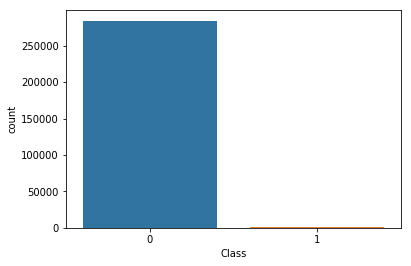

In [43]:
dt = pd.read_csv("creditcard.csv", header=0)
sns.countplot("Class", data=dt)
plt.show()

Claramente esto indica que las clases están desbalanceadas, a menos que...

<img src="momo_piñera.png" alt="imagen" style="width: 800px;"/>

---
### 3.b

#### Estandarización

In [44]:
dt["nAmount"] = skpp.StandardScaler().fit_transform(dt["Amount"].values.reshape(-1,1))
dt.drop(["Time", "Amount"], axis=1, inplace=True)
dt.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,nAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


Como los 28 primeros atributos provienen de una análisis _PCA_, ya se encuentran estandarizados. Es por esto que solo estandarizamos el monto, el cual es entregado aparte.

---
### 3.c

#### Modelo y Matriz de Confusión

In [45]:
def model(model, features_train, features_test, labels_train, labels_test, verbose=True):
    clf = model
    if type(labels_train) != np.ndarray:
        labels_train = labels_train.values.ravel()
    if type(labels_test) != np.ndarray:
        labels_test = labels_test.values.ravel()
    
    clf.fit(features_train, labels_train)
    pred = clf.predict(features_test)
    
    cnf_matrix = skmt.confusion_matrix(labels_test, pred)
    recall = cnf_matrix[1,1] / (cnf_matrix[1,1] + cnf_matrix[1,0])
    
    if verbose:
        print("The recall for this model is:", recall)
    
        fig = plt.figure(figsize=(14,5))
        print("TP:", cnf_matrix[1,1])
        print("TN:", cnf_matrix[0,0])
        print("FP:", cnf_matrix[0,1])
        print("FN:", cnf_matrix[1,0])

        plt.subplot(121)
        sns.heatmap(cnf_matrix, cmap="coolwarm_r", annot=True, linewidths=0.5)
        plt.title("Confussion Matrix")
        plt.xlabel("Predicted Class")
        plt.ylabel("Real Class")

        plt.subplot(122)
        fpr, tpr, _ = skmt.roc_curve(labels_test, pred, pos_label=1)
        plt.plot(fpr, tpr, label="roc curve (area = {:.3})".format(skmt.auc(fpr, tpr)))
        plt.grid()
        plt.title("ROC Curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()

        plt.show()

        print()
        print("Classification Report:")
        print(skmt.classification_report(labels_test, pred))
        
    return 2*cnf_matrix[1,1] /( 2*cnf_matrix[1,1] + cnf_matrix[0,1] + cnf_matrix[1,0] )

##### Preguntas:

* Una matriz de confusión es una representación visual del desempeño del clasificador, contabiliza los aciertos y errores de predicción con respecto a la data real (se divide en 4 secciones, _True Positives_, _False Positives_, _False Negatives_ y _True Negatives_).


* Entre las métricas comunes que se pueden calcular a partir de esta matriz se encuentran:
    * Exhaustividad o Sensibilidad (_recall_): $ \quad \text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}} $
    * Precisión (_presition_): $ \quad \text{PPV} = \frac{\text{TP}}{\text{TN} + \text{FN}} $
* se pueden calcular muchos más pero la mayoría son distintas combinaciones de la información obtenida en la matriz de confusión, en general, una de las cantidades dividida en la suma de su fila o columna, cada una con una semántica diferente. De todos estos indicadores creemos que el más importante para este caso de estudio es el _Fall-out_ o _False Positive Rate_, pues representa la proporción de **fraudes no identificados** como tales, que creemos es la situación más crítica.
    * _Fall-out_ : $ \quad \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}} $


* Entre otros indicadores que no siguen esta estructura encontramos:
    * Exactitud (_accuracy_): $ \quad \text{ACC} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}} $
    * $F_1$-score : $ \quad F_1 = \frac{2\text{TP}}{2\text{TP} + \text{FP} + \text{FN}} $


* La curva _ROC_ grafica el _True Positive Rate_ y el _False Positive Rate_ de un clasificador binario en función del parámetro de corte de la función de decisión de dicho clasificador. El desempeño del modelo es mejor mientras mayor sea el área bajo esta curva.
* Para cada punto de la curva tenemos un modelo diferente, y las coordenadas de ese punto nos entrega las relaciones de la matriz de confusión. En particular, las coordenadas del punto en la curva que corresponden al parámetro elegido por el modelo, coinciden con las relaciones en la matriz de confusión que se obtendrá.

---
### 3.d

#### Preparación de los datos

In [46]:
def data_preparation(x, verbose=True):
    x_features = x.iloc[:,x.columns != "Class"]
    x_labels = x.iloc[:,x.columns == "Class"]
    x_train, x_test, y_train, y_test = skms.train_test_split(x_features, x_labels, test_size=0.3)
    
    if verbose:
        print("Length of training data: {}".format(len(x_train)))
        print("Length of test data: {}".format(len(x_test)))
    return(x_train,x_test,y_train,y_test)

Esta función, en `train_test_split` saca un _Validation Set_ que contiene un 30% de los datos elegidos aleatoriamente, mientras que el nuevo _Train Set_ contiene un 70% de los datos del original.

In [47]:
def data_preparation_oversampling(x, y, verbose=True):
    x_train, x_test, y_train, y_test = skms.train_test_split(x, y, test_size=0.3)
    
    if verbose:
        print("Length of training data: {}".format(len(x_train)))
        print("Length of test data: {}".format(len(x_test)))
    return(x_train,x_test,y_train,y_test)

---
### 3.e

#### Undersample

In [48]:
def undersample(data, times, verbose=True):
    fraud_indices = np.array(data[data.Class==1].index)
    normal_indices = np.array(data[data.Class==0].index)
    
    Count_Normal_transacation = len(data[data["Class"]==0])
    Count_Fraud_transacation = len(data[data["Class"]==1])
    
    Normal_indices_undersample = np.array(
        np.random.choice(
            normal_indices,
            (times*Count_Fraud_transacation),
            replace=False
        )
    )
    
    undersample_data = np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = data.iloc[undersample_data,:]
    
    normal = len(undersample_data[undersample_data.Class==0]) / len(undersample_data["Class"])
    fraud = len(undersample_data[undersample_data.Class==1]) / len(undersample_data["Class"])
    
    if verbose:
        print("The normal transacation proportion is : {}".format(normal))
        print("The fraud transacation proportion is : {}".format(fraud))
    
    return(undersample_data)

Suponiendo que los datos provienen de la misma distribución y son independientes, podemos extraer una muestra aleatoria mucho más pequeña, pero que a la vez sea representativa de los casos no fraudulentos, de tal manera que al juntarlos con los casos fraudulentos, ambas cantidades sean comparables.

---
### 3.f

#### Logistic Regression y Undersample

In [49]:
x_tr, x_ts, y_tr, y_ts = data_preparation(dt)
real_x_tr = np.array(x_tr)
x_tr["Class"] = y_tr["Class"]
x_tr = x_tr.reset_index(drop=True)

Length of training data: 199364
Length of test data: 85443


In [50]:
def analize_proportion(method, i, x_tr, x_ts, y_tr, y_ts, undersampling=True, verbose=True):
    if verbose:
        print("The undersample data for {} proportion".format(i), end='\n\n')
    if undersampling:
        Undersample_data = undersample(x_tr, i, verbose=verbose)
    if verbose:
        print()
        print("----------------------Validation Set------------------------", end='\n\n')
        print("The model classification for {} proportion".format(i), end='\n\n')

    if undersampling:
        under_x, under_xt, under_yx, under_yxt = data_preparation(Undersample_data, verbose=verbose)
    else:
        under_x, under_xt, under_yx, under_yxt = data_preparation_oversampling(x_tr, y_tr, verbose=verbose)
    
    clf = method
    f1_val = model(clf, under_x, under_xt, under_yx, under_yxt, verbose=verbose)
    if verbose:
        print("--------------------------Testing Set---------------------------")
    f1_test = model(clf, under_x, x_ts, under_yx, y_ts, verbose=verbose)
    if verbose:
        print("---------------------------------------------------------------")
    return f1_val, f1_test

The undersample data for 1 proportion

The normal transacation proportion is : 0.5
The fraud transacation proportion is : 0.5

----------------------Validation Set------------------------

The model classification for 1 proportion

Length of training data: 481
Length of test data: 207
The recall for this model is: 0.923076923077
TP: 96
TN: 99
FP: 4
FN: 8


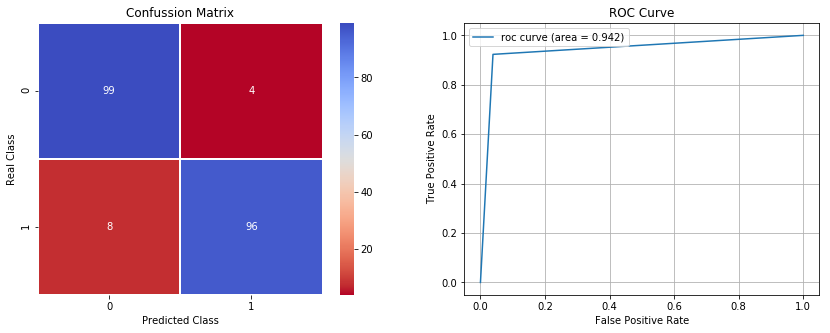


Classification Report:
             precision    recall  f1-score   support

          0       0.93      0.96      0.94       103
          1       0.96      0.92      0.94       104

avg / total       0.94      0.94      0.94       207

--------------------------Testing Set---------------------------
The recall for this model is: 0.871621621622
TP: 129
TN: 81560
FP: 3735
FN: 19


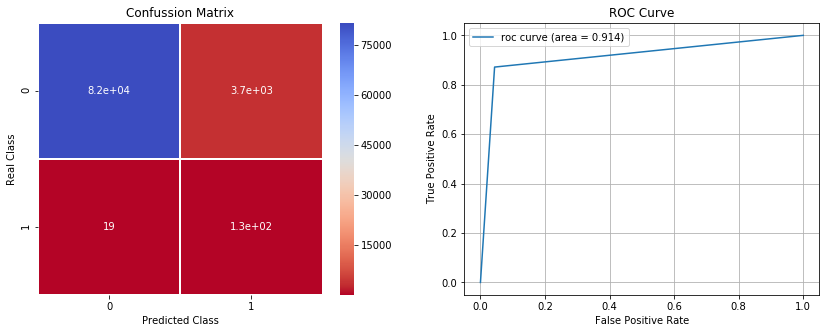


Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.96      0.98     85295
          1       0.03      0.87      0.06       148

avg / total       1.00      0.96      0.98     85443

---------------------------------------------------------------


In [51]:
_ = analize_proportion(sklm.LogisticRegression(), 1, x_tr, x_ts, y_tr, y_ts)

The undersample data for 2 proportion

The normal transacation proportion is : 0.6666666666666666
The fraud transacation proportion is : 0.3333333333333333

----------------------Validation Set------------------------

The model classification for 2 proportion

Length of training data: 722
Length of test data: 310
The recall for this model is: 0.883495145631
TP: 91
TN: 203
FP: 4
FN: 12


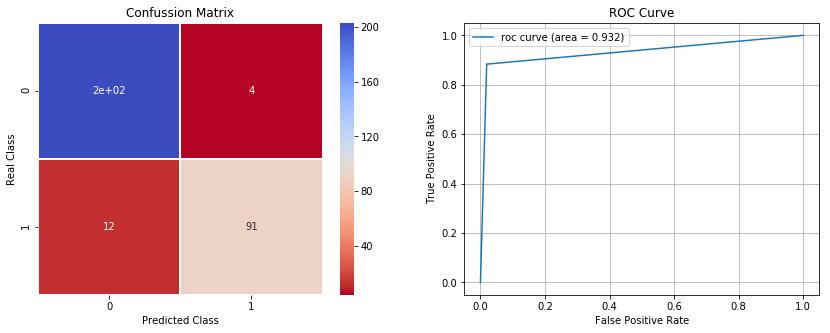


Classification Report:
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       207
          1       0.96      0.88      0.92       103

avg / total       0.95      0.95      0.95       310

--------------------------Testing Set---------------------------
The recall for this model is: 0.837837837838
TP: 124
TN: 83791
FP: 1504
FN: 24


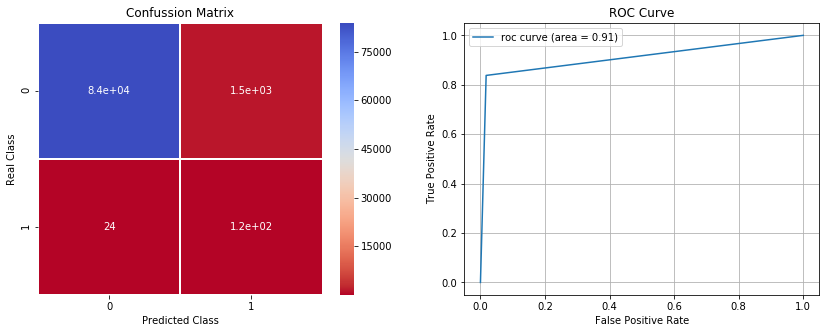


Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85295
          1       0.08      0.84      0.14       148

avg / total       1.00      0.98      0.99     85443

---------------------------------------------------------------


In [52]:
_ = analize_proportion(sklm.LogisticRegression(), 2, x_tr, x_ts, y_tr, y_ts)

The undersample data for 3 proportion

The normal transacation proportion is : 0.75
The fraud transacation proportion is : 0.25

----------------------Validation Set------------------------

The model classification for 3 proportion

Length of training data: 963
Length of test data: 413
The recall for this model is: 0.918367346939
TP: 90
TN: 310
FP: 5
FN: 8


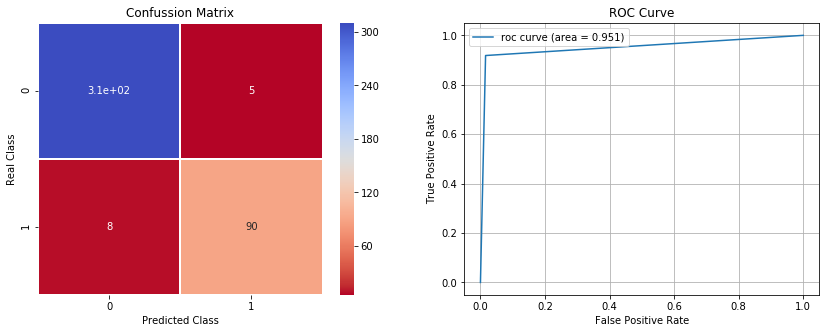


Classification Report:
             precision    recall  f1-score   support

          0       0.97      0.98      0.98       315
          1       0.95      0.92      0.93        98

avg / total       0.97      0.97      0.97       413

--------------------------Testing Set---------------------------
The recall for this model is: 0.844594594595
TP: 125
TN: 84206
FP: 1089
FN: 23


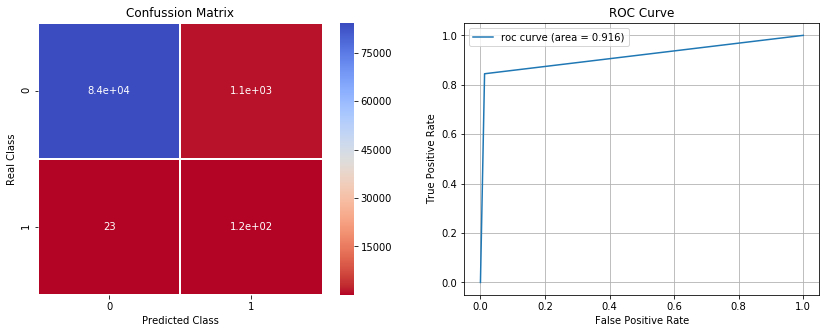


Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     85295
          1       0.10      0.84      0.18       148

avg / total       1.00      0.99      0.99     85443

---------------------------------------------------------------


In [53]:
_ = analize_proportion(sklm.LogisticRegression(), 3, x_tr, x_ts, y_tr, y_ts)

The undersample data for 4 proportion

The normal transacation proportion is : 0.8
The fraud transacation proportion is : 0.2

----------------------Validation Set------------------------

The model classification for 4 proportion

Length of training data: 1204
Length of test data: 516
The recall for this model is: 0.95145631068
TP: 98
TN: 410
FP: 3
FN: 5


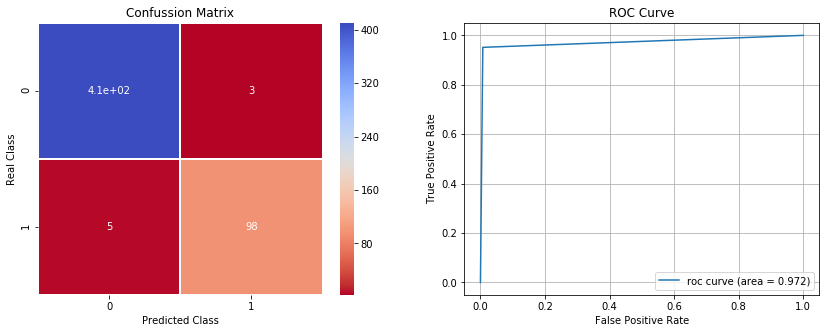


Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       413
          1       0.97      0.95      0.96       103

avg / total       0.98      0.98      0.98       516

--------------------------Testing Set---------------------------
The recall for this model is: 0.837837837838
TP: 124
TN: 84462
FP: 833
FN: 24


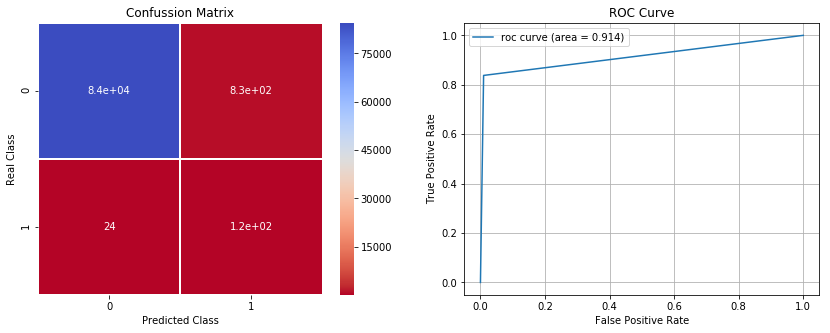


Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     85295
          1       0.13      0.84      0.22       148

avg / total       1.00      0.99      0.99     85443

---------------------------------------------------------------


In [54]:
_ = analize_proportion(sklm.LogisticRegression(), 4, x_tr, x_ts, y_tr, y_ts)

---

##### Naive Bayes:

The undersample data for 1 proportion

The normal transacation proportion is : 0.5
The fraud transacation proportion is : 0.5

----------------------Validation Set------------------------

The model classification for 1 proportion

Length of training data: 481
Length of test data: 207
The recall for this model is: 0.871794871795
TP: 102
TN: 89
FP: 1
FN: 15


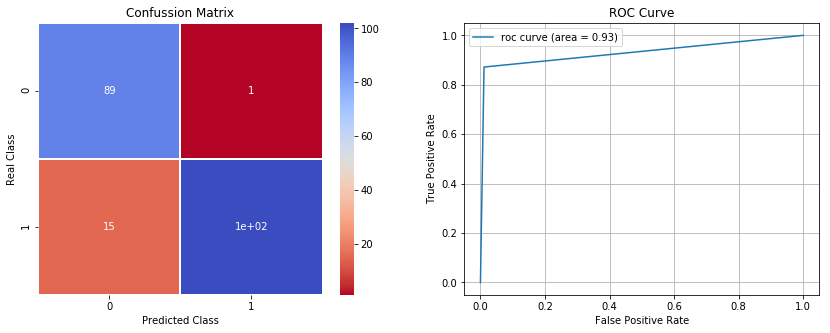


Classification Report:
             precision    recall  f1-score   support

          0       0.86      0.99      0.92        90
          1       0.99      0.87      0.93       117

avg / total       0.93      0.92      0.92       207

--------------------------Testing Set---------------------------
The recall for this model is: 0.77027027027
TP: 114
TN: 84598
FP: 697
FN: 34


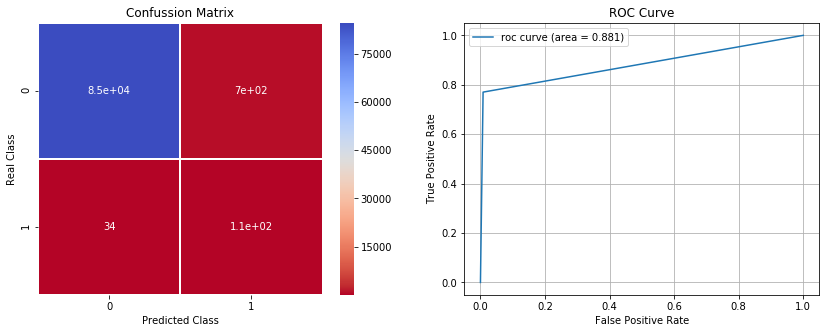


Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85295
          1       0.14      0.77      0.24       148

avg / total       1.00      0.99      0.99     85443

---------------------------------------------------------------


In [55]:
_ = analize_proportion(sknb.BernoulliNB(), 1, x_tr, x_ts, y_tr, y_ts)

The undersample data for 2 proportion

The normal transacation proportion is : 0.6666666666666666
The fraud transacation proportion is : 0.3333333333333333

----------------------Validation Set------------------------

The model classification for 2 proportion

Length of training data: 722
Length of test data: 310
The recall for this model is: 0.818181818182
TP: 90
TN: 200
FP: 0
FN: 20


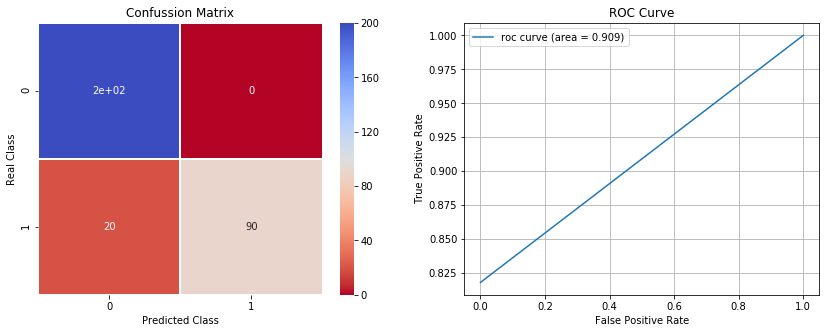


Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       200
          1       1.00      0.82      0.90       110

avg / total       0.94      0.94      0.93       310

--------------------------Testing Set---------------------------
The recall for this model is: 0.763513513514
TP: 113
TN: 85024
FP: 271
FN: 35


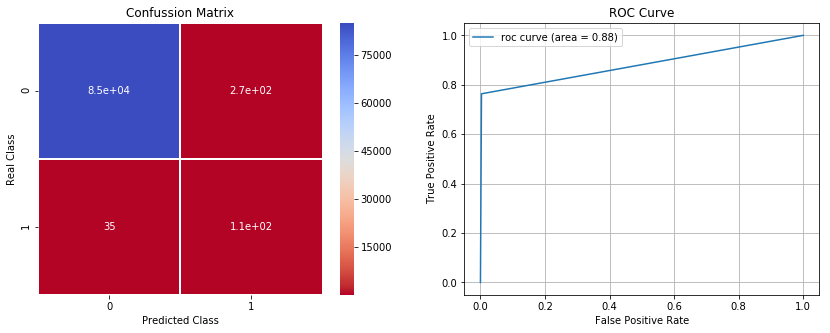


Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85295
          1       0.29      0.76      0.42       148

avg / total       1.00      1.00      1.00     85443

---------------------------------------------------------------


In [56]:
_ = analize_proportion(sknb.BernoulliNB(), 2, x_tr, x_ts, y_tr, y_ts)

The undersample data for 3 proportion

The normal transacation proportion is : 0.75
The fraud transacation proportion is : 0.25

----------------------Validation Set------------------------

The model classification for 3 proportion

Length of training data: 963
Length of test data: 413
The recall for this model is: 0.860215053763
TP: 80
TN: 320
FP: 0
FN: 13


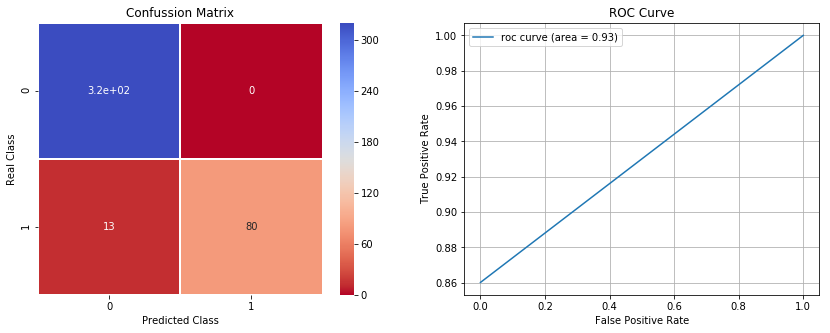


Classification Report:
             precision    recall  f1-score   support

          0       0.96      1.00      0.98       320
          1       1.00      0.86      0.92        93

avg / total       0.97      0.97      0.97       413

--------------------------Testing Set---------------------------
The recall for this model is: 0.763513513514
TP: 113
TN: 84968
FP: 327
FN: 35


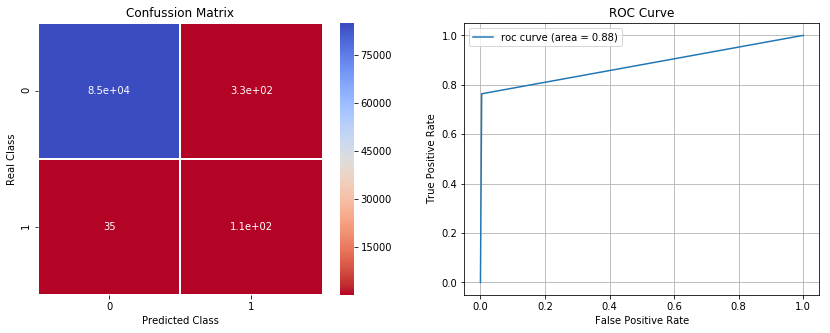


Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85295
          1       0.26      0.76      0.38       148

avg / total       1.00      1.00      1.00     85443

---------------------------------------------------------------


In [57]:
_ = analize_proportion(sknb.BernoulliNB(), 3, x_tr, x_ts, y_tr, y_ts)

The undersample data for 4 proportion

The normal transacation proportion is : 0.8
The fraud transacation proportion is : 0.2

----------------------Validation Set------------------------

The model classification for 4 proportion

Length of training data: 1204
Length of test data: 516
The recall for this model is: 0.87
TP: 87
TN: 413
FP: 3
FN: 13


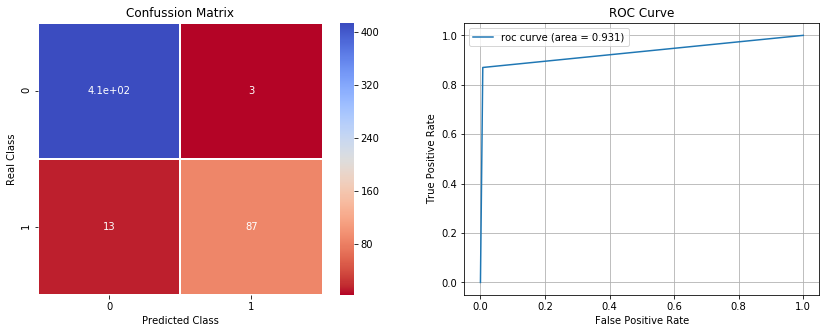


Classification Report:
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       416
          1       0.97      0.87      0.92       100

avg / total       0.97      0.97      0.97       516

--------------------------Testing Set---------------------------
The recall for this model is: 0.75
TP: 111
TN: 85079
FP: 216
FN: 37


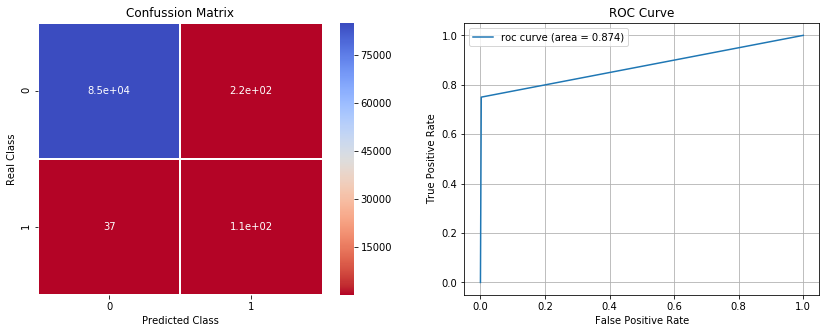


Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85295
          1       0.34      0.75      0.47       148

avg / total       1.00      1.00      1.00     85443

---------------------------------------------------------------


In [58]:
_ = analize_proportion(sknb.BernoulliNB(), 4, x_tr, x_ts, y_tr, y_ts)

##### Sumario

*Logistic Undersample*

In [59]:
f1_logistic_undersample_1 = np.zeros((2, 20))
for i in range(20):
    f1_logistic_undersample_1[:,i] = analize_proportion(
        sklm.LogisticRegression(), 1, x_tr, x_ts, y_tr, y_ts, verbose=False
    )

In [60]:
f1_logistic_undersample_2 = np.zeros((2, 20))
for i in range(20):
    f1_logistic_undersample_2[:,i] = analize_proportion(
        sklm.LogisticRegression(), 2, x_tr, x_ts, y_tr, y_ts, verbose=False
    )

In [61]:
f1_logistic_undersample_3 = np.zeros((2, 20))
for i in range(20):
    f1_logistic_undersample_3[:,i] = analize_proportion(
        sklm.LogisticRegression(), 3, x_tr, x_ts, y_tr, y_ts, verbose=False
    )

In [62]:
f1_logistic_undersample_4 = np.zeros((2, 20))
for i in range(20):
    f1_logistic_undersample_4[:,i] = analize_proportion(
        sklm.LogisticRegression(), 4, x_tr, x_ts, y_tr, y_ts, verbose=False
    )

*Naive Bayes Undersample*

In [63]:
f1_nb_undersample_1 = np.zeros((2, 20))
for i in range(20):
    f1_nb_undersample_1[:,i] = analize_proportion(
        sknb.BernoulliNB(), 1, x_tr, x_ts, y_tr, y_ts, verbose=False
    )

In [64]:
f1_nb_undersample_2 = np.zeros((2, 20))
for i in range(20):
    f1_nb_undersample_2[:,i] = analize_proportion(
        sknb.BernoulliNB(), 2, x_tr, x_ts, y_tr, y_ts, verbose=False
    )

In [65]:
f1_nb_undersample_3 = np.zeros((2, 20))
for i in range(20):
    f1_nb_undersample_3[:,i] = analize_proportion(
        sknb.BernoulliNB(), 3, x_tr, x_ts, y_tr, y_ts, verbose=False
    )

In [66]:
f1_nb_undersample_4 = np.zeros((2, 20))
for i in range(20):
    f1_nb_undersample_4[:,i] = analize_proportion(
        sknb.BernoulliNB(), 4, x_tr, x_ts, y_tr, y_ts, verbose=False
    )

*Comparación*

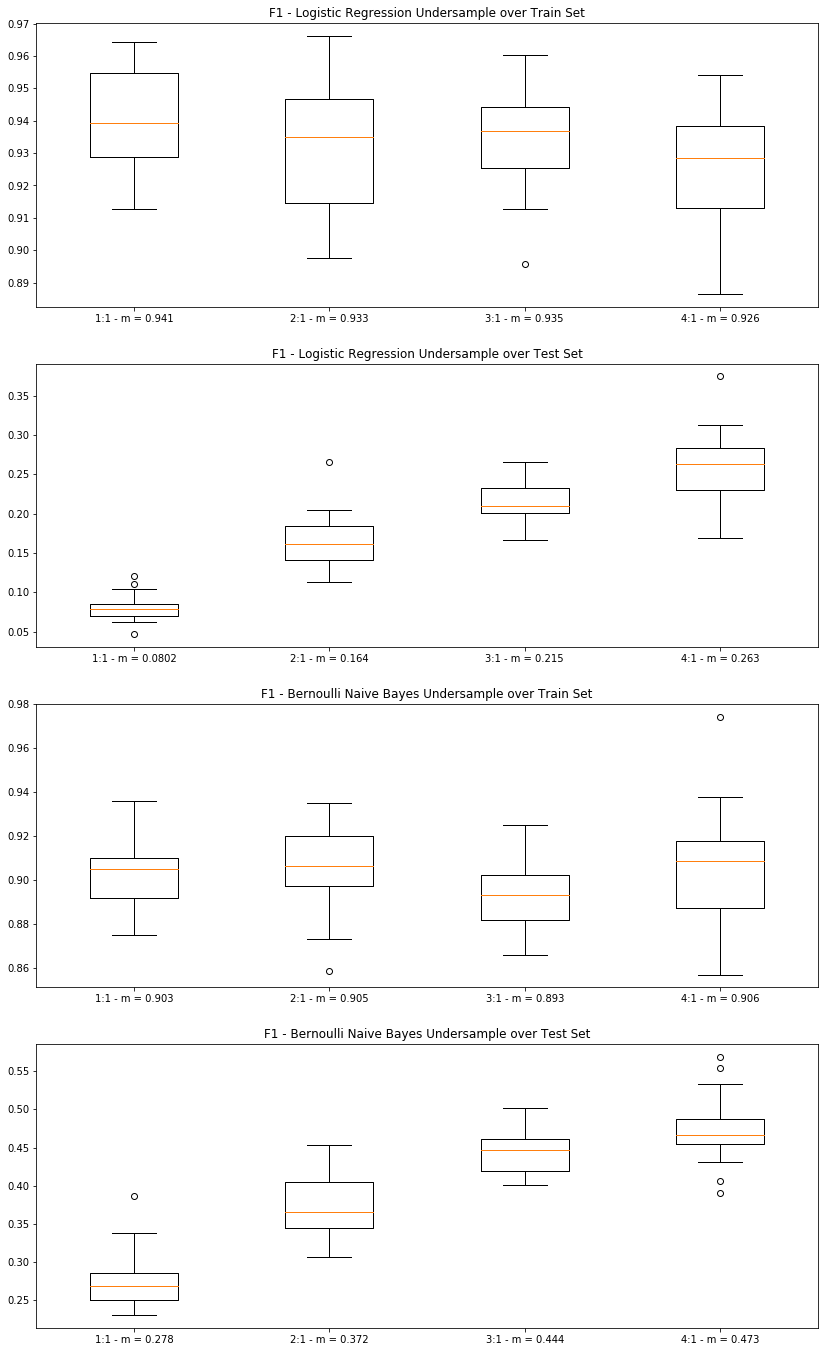

In [77]:
fig = plt.figure(figsize=(14,24))

ax1 = fig.add_subplot(411)
ax1.set_title('F1 - Logistic Regression Undersample over Train Set')
ax1.boxplot([
    f1_logistic_undersample_1[0,:],
    f1_logistic_undersample_2[0,:],
    f1_logistic_undersample_3[0,:],
    f1_logistic_undersample_4[0,:]
], labels=[
    '1:1 - m = {:<.3}'.format(np.mean(f1_logistic_undersample_1[0,:])),
    '2:1 - m = {:<.3}'.format(np.mean(f1_logistic_undersample_2[0,:])),
    '3:1 - m = {:<.3}'.format(np.mean(f1_logistic_undersample_3[0,:])),
    '4:1 - m = {:<.3}'.format(np.mean(f1_logistic_undersample_4[0,:]))
])

ax2 = fig.add_subplot(412)
ax2.set_title('F1 - Logistic Regression Undersample over Test Set')
ax2.boxplot([
    f1_logistic_undersample_1[1,:],
    f1_logistic_undersample_2[1,:],
    f1_logistic_undersample_3[1,:],
    f1_logistic_undersample_4[1,:]
], labels=[
    '1:1 - m = {:<.3}'.format(np.mean(f1_logistic_undersample_1[1,:])),
    '2:1 - m = {:<.3}'.format(np.mean(f1_logistic_undersample_2[1,:])),
    '3:1 - m = {:<.3}'.format(np.mean(f1_logistic_undersample_3[1,:])),
    '4:1 - m = {:<.3}'.format(np.mean(f1_logistic_undersample_4[1,:]))
])

ax3 = fig.add_subplot(413)
ax3.set_title('F1 - Bernoulli Naive Bayes Undersample over Train Set')
ax3.boxplot([
    f1_nb_undersample_1[0,:],
    f1_nb_undersample_2[0,:],
    f1_nb_undersample_3[0,:],
    f1_nb_undersample_4[0,:]
], labels=[
    '1:1 - m = {:<.3}'.format(np.mean(f1_nb_undersample_1[0,:])),
    '2:1 - m = {:<.3}'.format(np.mean(f1_nb_undersample_2[0,:])),
    '3:1 - m = {:<.3}'.format(np.mean(f1_nb_undersample_3[0,:])),
    '4:1 - m = {:<.3}'.format(np.mean(f1_nb_undersample_4[0,:]))
])

ax4 = fig.add_subplot(414)
ax4.set_title('F1 - Bernoulli Naive Bayes Undersample over Test Set')
ax4.boxplot([
    f1_nb_undersample_1[1,:],
    f1_nb_undersample_2[1,:],
    f1_nb_undersample_3[1,:],
    f1_nb_undersample_4[1,:]
], labels=[
    '1:1 - m = {:<.3}'.format(np.mean(f1_nb_undersample_1[1,:])),
    '2:1 - m = {:<.3}'.format(np.mean(f1_nb_undersample_2[1,:])),
    '3:1 - m = {:<.3}'.format(np.mean(f1_nb_undersample_3[1,:])),
    '4:1 - m = {:<.3}'.format(np.mean(f1_nb_undersample_4[1,:]))
])

plt.show()

* Podemos ver que cuando tenemos una proporción de 1:1, a pesar de que las clases se encuentran equirepresentadas, perdemos demasiada información. Es preferible dejar una brecha más grande entre la representación de las clases con tal de tener más datos de entrenamiento y disminuir el error sobre el _Test Set_.
* En este caso _Naive Bayes_ tiene mucho mejor rendimiento sobre el _Test Set_.

---
### 3.g

#### Oversampling y SMOTE

In [68]:
os = imbos.SMOTE(random_state=0, n_jobs=4)
os_data_X, os_data_y = os.fit_sample(real_x_tr,np.array(y_tr).flatten())

In [69]:
print("   Fraudes : {}".format(np.sum(os_data_y == 1)))
print("No Fraudes : {}".format(np.sum(os_data_y == 0)))

   Fraudes : 199020
No Fraudes : 199020


In [70]:
os_data_X.shape

(398040, 29)

The undersample data for 1 proportion


----------------------Validation Set------------------------

The model classification for 1 proportion

Length of training data: 278628
Length of test data: 119412
The recall for this model is: 0.924750952731
TP: 55326
TN: 58325
FP: 1259
FN: 4502


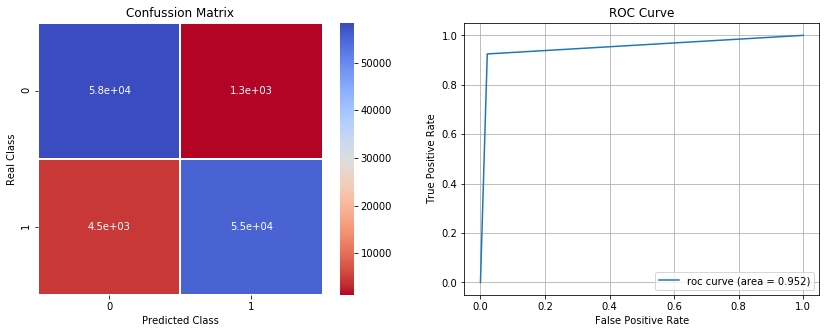


Classification Report:
             precision    recall  f1-score   support

          0       0.93      0.98      0.95     59584
          1       0.98      0.92      0.95     59828

avg / total       0.95      0.95      0.95    119412

--------------------------Testing Set---------------------------
The recall for this model is: 0.837837837838
TP: 124
TN: 83546
FP: 1749
FN: 24


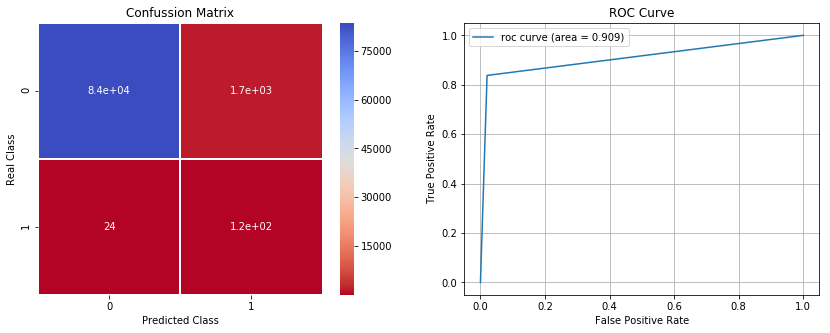


Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85295
          1       0.07      0.84      0.12       148

avg / total       1.00      0.98      0.99     85443

---------------------------------------------------------------


In [71]:
_ = analize_proportion(sklm.LogisticRegression(), 1, os_data_X, x_ts, os_data_y, y_ts, undersampling=False)

The undersample data for 1 proportion


----------------------Validation Set------------------------

The model classification for 1 proportion

Length of training data: 278628
Length of test data: 119412
The recall for this model is: 0.83989202059
TP: 50092
TN: 59404
FP: 367
FN: 9549


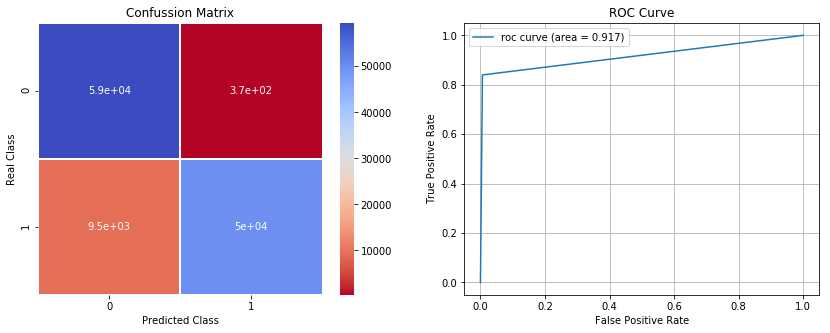


Classification Report:
             precision    recall  f1-score   support

          0       0.86      0.99      0.92     59771
          1       0.99      0.84      0.91     59641

avg / total       0.93      0.92      0.92    119412

--------------------------Testing Set---------------------------
The recall for this model is: 0.763513513514
TP: 113
TN: 84779
FP: 516
FN: 35


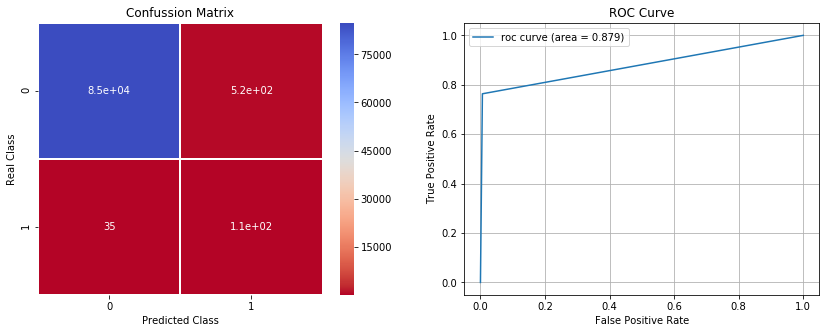


Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85295
          1       0.18      0.76      0.29       148

avg / total       1.00      0.99      1.00     85443

---------------------------------------------------------------


In [72]:
_ = analize_proportion(sknb.BernoulliNB(), 1, os_data_X, x_ts, os_data_y, y_ts, undersampling=False)

##### Sumario

In [73]:
f1_logistic_oversample = np.zeros((2, 20))
for i in range(20):
    f1_logistic_oversample[:,i] = analize_proportion(
        sklm.LogisticRegression(), 1, os_data_X, x_ts, os_data_y, y_ts, undersampling=False, verbose=False
    )

In [74]:
f1_nb_oversample = np.zeros((2, 20))
for i in range(20):
    f1_nb_oversample[:,i] = analize_proportion(
        sknb.BernoulliNB(), 1, os_data_X, x_ts, os_data_y, y_ts, undersampling=False, verbose=False
    )

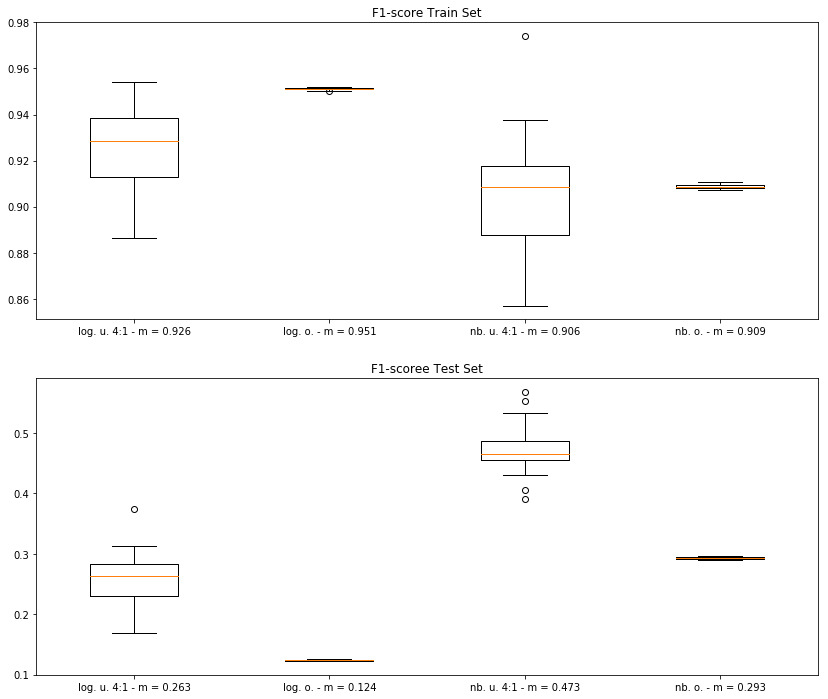

In [76]:
fig = plt.figure(figsize=(14,12))

ax1 = fig.add_subplot(211)
ax1.set_title('F1-score Train Set')
ax1.boxplot([
    f1_logistic_undersample_4[0,:],
    f1_logistic_oversample[0,:],
    f1_nb_undersample_4[0,:],
    f1_nb_oversample[0,:]
], labels=[
    'log. u. 4:1 - m = {:<.3}'.format(np.mean(f1_logistic_undersample_4[0,:])),
    'log. o. - m = {:<.3}'.format(np.mean(f1_logistic_oversample[0,:])),
    'nb. u. 4:1 - m = {:<.3}'.format(np.mean(f1_nb_undersample_4[0,:])),
    'nb. o. - m = {:<.3}'.format(np.mean(f1_nb_oversample[0,:]))
])

ax2 = fig.add_subplot(212)
ax2.set_title('F1-scoree Test Set')
ax2.boxplot([
    f1_logistic_undersample_4[1,:],
    f1_logistic_oversample[1,:],
    f1_nb_undersample_4[1,:],
    f1_nb_oversample[1,:]
], labels=[
    'log. u. 4:1 - m = {:<.3}'.format(np.mean(f1_logistic_undersample_4[1,:])),
    'log. o. - m = {:<.3}'.format(np.mean(f1_logistic_oversample[1,:])),
    'nb. u. 4:1 - m = {:<.3}'.format(np.mean(f1_nb_undersample_4[1,:])),
    'nb. o. - m = {:<.3}'.format(np.mean(f1_nb_oversample[1,:]))
])

plt.show()

* Debido a que siempre se utilizan los mismos datos de la clase 0 y a la cantidad de datos sintéticos, _Oversampling_ prácticamente no presenta varianza en su $F_1$ _score_. Esto también se debe a la baja cantidad de datos a partir de la cual creamos un gran número de datos sintéticos, lo que resulta en una distribución prácticamente idéntica en cada _Oversampling_.
* _Undersampling_ tiene un claro mejor desempeño sobre el _Test Set_. Esto se debe a que como los datos generados son tan similares, el modelo confía demasiado en ellos, empeorando el desempeño sobre nueva data (_overffitting_), en cambio el _Undersample_, si bien pierde muchos datos, esto no conlleva una pérdida de información significativa debido a la sobrerrepresentación de los no fraudes.

---

---

---